## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv("Titanic_test.csv")
df_train = pd.read_csv("Titanic_train.csv")

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [5]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
df_test.info()
df_train.info()

# df_test 少了 Survived項

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [7]:
#可以嘗試用範例的程式
print(df_test.isnull().any())
print(df_test.isnull().any().sum())

print(df_train.isnull().any())
print(df_train.isnull().any().sum())

# 二者均有遺失值

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
3


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [8]:
#合併資料
df_merged = pd.merge(df_train, df_test, how="outer")
df_merged.to_csv("Titanic_merged.csv")

In [10]:
# 以 XXX 為例，先看 Cabin  出現值的特性
df_merged = pd.read_csv("Titanic_merged.csv")
df_merged["Cabin"] = df_merged["Cabin"].replace("null", np.NAN)
df_merged["Cabin"] = df_merged["Cabin"].fillna("UA_cabin")
df_merged["Cabin"].value_counts()

# 由於無法獲知艙房號碼者佔相對多數，以下以是否獲知艙房號碼為比較依據

UA_cabin           1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
B96 B98               4
                   ... 
C50                   1
C111                  1
C87                   1
C99                   1
B11                   1
Name: Cabin, Length: 187, dtype: int64

C:\Users\benao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

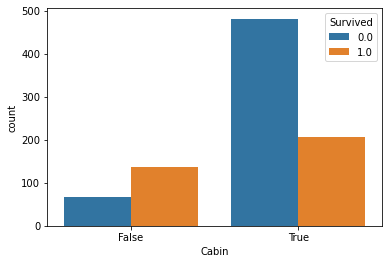

In [11]:
sns.countplot(df_merged["Cabin"]=="UA_cabin", hue=df_merged["Survived"])

In [ ]:
# 觀察圖得知，已知艙房號碼者存活數約為死亡數的二倍，未能獲知艙房號碼者死亡數大幅超過存活數，或許是存活者才有機會告知他人其艙房號碼